In [1]:
import pandas as pd
import numpy as np

## 파일 불러오기

In [2]:
test_data = pd.read_csv('./testfile.csv')

## 구조 확인하기

In [3]:
test_data.shape

(26, 5)

In [4]:
test_data.head()

,name,class,math,english,korean
0,A,1,96,90,95
1,B,1,95,66,71
2,C,2,91,89,92
3,D,1,92,83,87
4,E,2,93,84,95


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     26 non-null     object
 1   class    26 non-null     int64 
 2   math     26 non-null     int64 
 3   english  26 non-null     int64 
 4   korean   26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [6]:
test_data.columns

Index(['name', 'class', 'math', 'english', 'korean'], dtype='object')

In [7]:
test_data.index

RangeIndex(start=0, stop=26, step=1)

In [10]:
test_data['math'].head()

0    96
1    95
2    91
3    92
4    93
Name: math, dtype: int64

## 데이터 정리

### astype()

In [14]:
test_data = test_data.astype({'class':'category'})
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   name     26 non-null     object  
 1   class    26 non-null     category
 2   math     26 non-null     int64   
 3   english  26 non-null     int64   
 4   korean   26 non-null     int64   
dtypes: category(1), int64(3), object(1)
memory usage: 1.1+ KB


### rename()

In [16]:
test_data.rename(columns = {'name' : '이름', 'class' : '학급명', 'math' : '수학', 'english' : '영어', 'korean' : '국어'}, inplace = True)
test_data.columns

Index(['이름', '학급명', '수학', '영어', '국어'], dtype='object')

## 데이터 분석

### index

In [22]:
test_data.isin([99,100]).head()

,이름,학급명,수학,영어,국어
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [21]:
# 국어 성적 중에서 99점과 100점이 있는지 확인
test_data[['국어']].isin([99,100])

,국어
0,False
1,False
2,False
3,False
4,False
5,True
6,False
7,False
8,False
9,False


In [25]:
# 학급(class) 별 학생 수를 확인
test_data['학급명'].value_counts()

2    11
1    10
3     5
Name: 학급명, dtype: int64

> 확인한 값을 인덱스를 기준으로 정렬하고 싶으면 value_counts() 함수의 괄호 내에 sort=False를 작성한다.

In [26]:
test_data['학급명'].value_counts(sort=False)

1    10
2    11
3     5
Name: 학급명, dtype: int64

### unique

In [28]:
# 컬럼에 대해 유일한 값을 확인
test_data['학급명'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [29]:
test_data['학급명'].nunique()

3

## 데이터 시각화

### barh() : 가로 막대 그래프
* 범주형 자료를 범례의 개수에 따라 좀 더 한눈에 확인하기 좋게 하기위해 사용

In [32]:
import matplotlib.pyplot as plt

In [37]:
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

#### 그래프 사이즈 설정 (10,7)

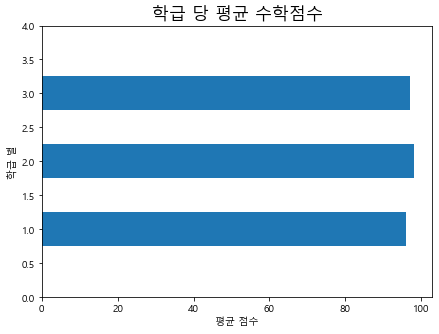

In [45]:
# 그래프 사이즈 설정 (7,5)
fig, axes = plt.subplots(figsize = (7,5))
# X축 : 학급, Y축 : 수학점수, 그래프 높이 0.7
axes.barh(test_data['학급명'], test_data['수학'], height = 0.5)
# 그래프 제목
axes.set_title("학급 당 평균 수학점수", size= 17)
# 그래프 X축:  평균 점수 / Y축: 학급 별
axes.set_xlabel("평균 점수", size= 10)
axes.set_ylabel("학급 별", size= 10)
# 그래프의 마진: 0.3
plt.margins(y= 0.3)

In [46]:
# 이미지 출력
# plt.savefig("./img/img.svg", format="svg")

### boxplot() : 상자 그림
* 연속형 자료의 퍼진 정도를 나타내주는 요약 통계량을 보기 쉽게 도와줌

Text(0, 0.5, '점수')

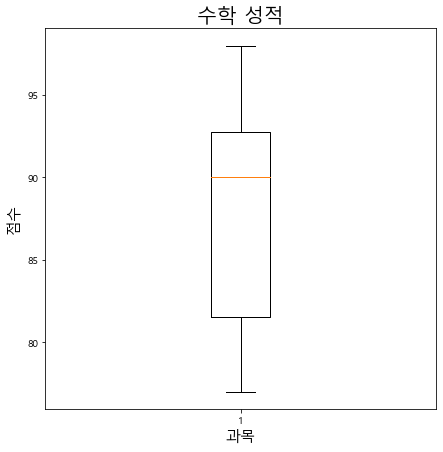

In [56]:
fig, axes = plt.subplots(figsize = (7,7)) # 그래프의 사이즈
#axes.boxplot(test_data['math'])

# 수학에 대한 상자 그림
axes.boxplot(test_data['수학'])

axes.set_title("수학 성적", size=20) # 제목

axes.set_xlabel("과목", size=15) # X축 이름
axes.set_ylabel("점수", size=15) # Y축 이름

> 여러 개의 상자 그림을 그릴 때에는 **,** 를 기준으로 사용될 데이터를 입력

Text(0, 0.5, '점수')

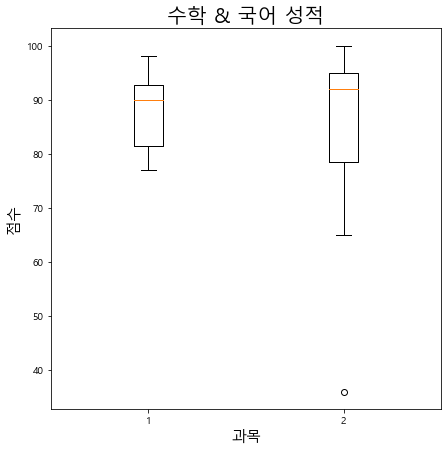

In [55]:
fig, axes = plt.subplots(figsize = (7,7)) # 그래프의 사이즈
#axes.boxplot(test_data['math'])

# 수학과 국어에 대한 상자 그림
axes.boxplot((test_data['수학'], test_data['국어']))

axes.set_title("수학 & 국어 성적", size=20) # 제목

axes.set_xlabel("과목", size=15) # X축 이름
axes.set_ylabel("점수", size=15) # Y축 이름

### bar() : 세로 막대 그래프
* 범주형 자료를 시각화 할 때 가장 범용적으로 사용되는 방법

학급(class) 별 학생 수를 구하고 인덱스로 내림차순하여 counts 변수에 저장

In [70]:
# counts = test_data.groupby('학급명')['이름'].count()
counts = test_data['학급명'].value_counts().sort_index()
counts

1    10
2    11
3     5
Name: 학급명, dtype: int64

Text(0, 0.5, '학생 수')

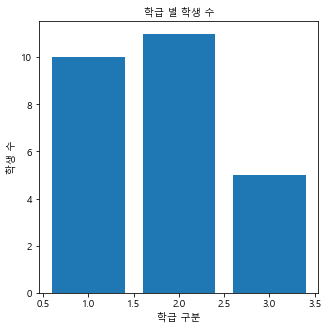

In [77]:
# bar graph
fig, axes = plt.subplots(figsize = (5,5))

# X값 : counts.index, Y값 : counts.values
axes.bar(counts.index, counts.values)

axes.set_title("학급 별 학생 수", size = 10)
axes.set_xlabel("학급 구분", size = 10)
axes.set_ylabel("학생 수", size = 10)

In [ ]:
# bar graph
fig, axes = plt.subplots(figsize = (10,10))

# X값 : counts.index, Y값 : counts.values
axes.bar(counts.index, counts.values)

axes.set_title("학급 별 학생 수", size= 30)

axes.set_xlabel("학급 구분", size= 20)
axes.set_ylabel("학생 수", size= 20)